## Importing libraries

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

## Read the file into the dataframe and observe its features from first few entries


In [3]:
df=pd.read_csv('income.csv')


In [4]:
print(df.head())

      Name  Age  Income($)
0      Rob   27      70000
1  Michael   29      90000
2    Mohan   29      61000
3   Ismail   28      60000
4     Kory   42     150000


## Visualize the data trend using matplotlib


Text(0, 0.5, 'Income($)')

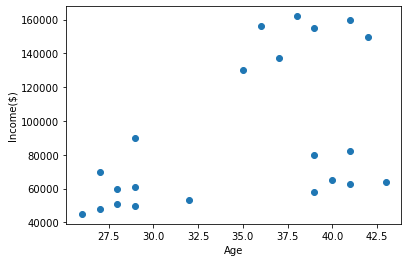

In [6]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

## In this case just by observing we can say . Take K=3
## Now applying KMeans


In [12]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Age','Income($)']])
print(y_pred)
print()
#Appending a column
df['Cluster']=y_pred
print(df.head())

[2 2 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 1]

      Name  Age  Income($)  Cluster
0      Rob   27      70000        2
1  Michael   29      90000        2
2    Mohan   29      61000        1
3   Ismail   28      60000        1
4     Kory   42     150000        0


## See the centroids


In [17]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

## Visualize the clusters and the centroid

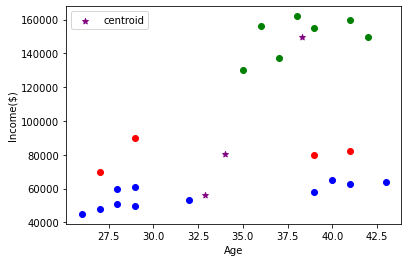

In [22]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.scatter(df3.Age,df3['Income($)'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

## We can see the above, clustering is  not done well. Reason is features are not scaled properly. See the features and do scaling

In [33]:
scaler=MinMaxScaler()
df['Age']=scaler.fit_transform(df[['Age']])
df['Income($)']=scaler.fit_transform(df[['Income($)']])
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [41]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Age','Income($)']])
df['Cluster']=y_pred
df.head()
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

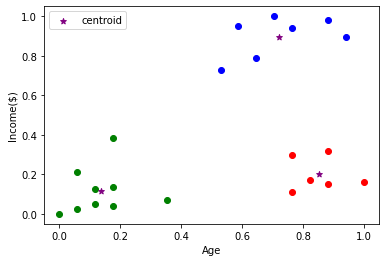

In [42]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.scatter(df3.Age,df3['Income($)'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

 ##  Here K=3 works . But not always we can guess the correct k. We use elbow method

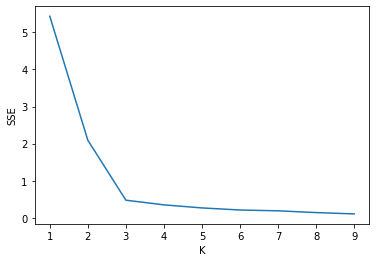

In [47]:
sse=[]
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
k_rng=range(1,10)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

## K=3 according to elbow method